# Pandas 2 Lab
    Ben Christensen
    Math 403
    October 9, 2018

In [1]:
import pandas as pd
import numpy as np
from pydataset import data
from matplotlib import pyplot as plt

## Problem 1

In [2]:
#Read in the data on accidents and the drivers involved
filename1 = "/Users/benchristensen/Desktop/ACME Python Labs/Volume3/Pandas1/final_accidents2.pickle"
filename2 = "/Users/benchristensen/Desktop/ACME Python Labs/Volume3/Pandas1/final_drivers.pickle"
accidents = pd.read_pickle(filename1)
drivers = pd.read_pickle(filename2)

In [3]:
#Drop unkown values in variables. We can examine them later if we
# feel the need. For visualization they detract from the information
# we know.
accidents = accidents[(accidents["WEATHER"] <= 12) & 
                      (accidents["MONTH"] <= 12) & 
                      (accidents["SP"]<=1)]

drivers = drivers[(drivers["AGE"] < 150) & 
                  (drivers["DRINKING"] <= 1) & 
                  (drivers["SPEEDREL"] <= 5)]

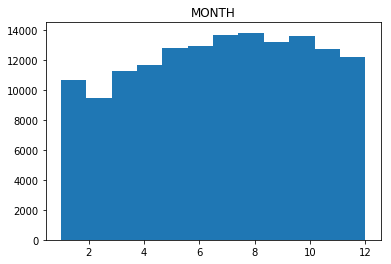

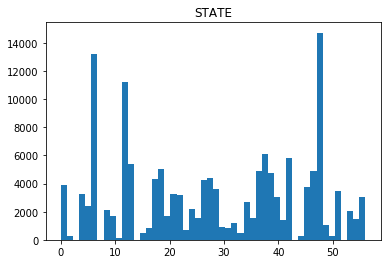

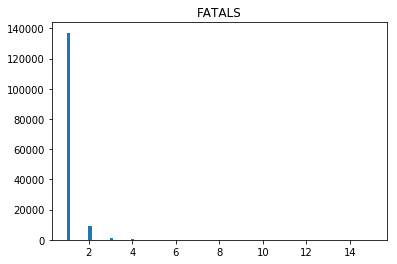

In [4]:
#A few histograms of accidents
accidents[["MONTH"]].hist(grid=False, bins=12)
plt.show()
accidents[["STATE"]].hist(grid=False, bins=50)
plt.show()
accidents[["FATALS"]].hist(grid=False, bins=100)
plt.show()

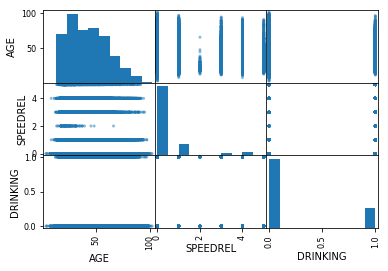

In [5]:
#Create a scatter matrix for age, speed, and drinking to see if there
# is any correlation
pd.plotting.scatter_matrix(drivers[['AGE', "SPEEDREL", "DRINKING"]])
plt.show()

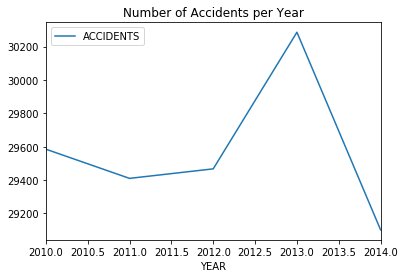

In [6]:
#Calculate the number of accidents per year and plot it
accidents["accident_ind"] = 1
yearly_accidents = [accidents[accidents["YEAR"]==i]["accident_ind"].count() for i in range(2010, 2015)]
accidents["ACCIDENTS"] = 0
for i in range(2010, 2015):
    accidents.loc[accidents["YEAR"] == i, ["ACCIDENTS"]] = yearly_accidents[2010-i]
accidents.plot(x="YEAR", y="ACCIDENTS")
plt.title("Number of Accidents per Year")
plt.show()

## Problem 2

In [7]:
#Merge the datasets to compare variables across datasets
combined = pd.merge(accidents, drivers, on=['ST_CASE', 'YEAR'])
combined.index = combined["YEAR"]

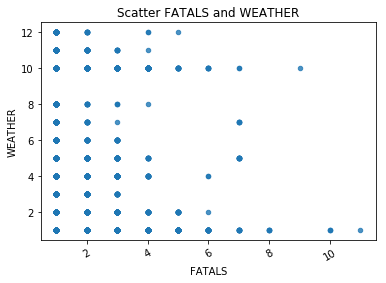

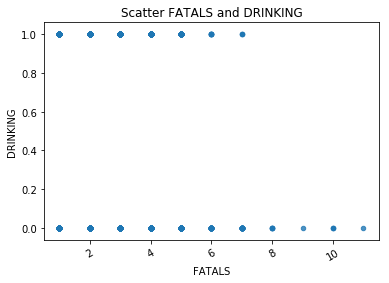

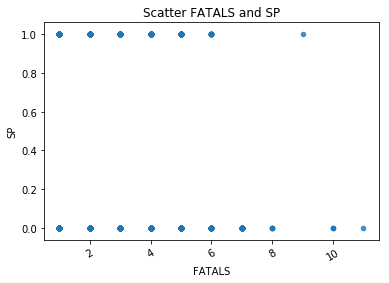

In [8]:
#Scatter several variables on "FATALS"
for var in ["WEATHER", "DRINKING", "SP"]:
    combined.plot(kind="scatter", x="FATALS", y=var, alpha=.8, rot=30)
    plt.title("Scatter FATALS and " + var)
    plt.show()


## Problem 3

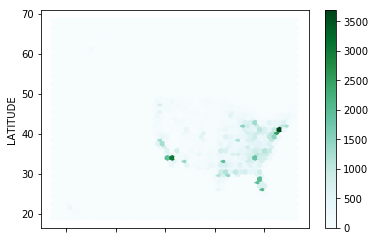

In [9]:
#Hexplot number of accidents by longitude and latitude
accidents.plot(kind="Hexbin", x="LONGITUD", y="LATITUDE", gridsize=50)
plt.show()

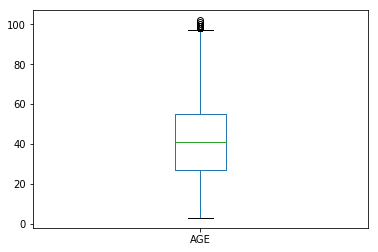

In [10]:
#Create box plot of Ages in the dataset
combined.plot(kind="box", y="AGE")
plt.show()

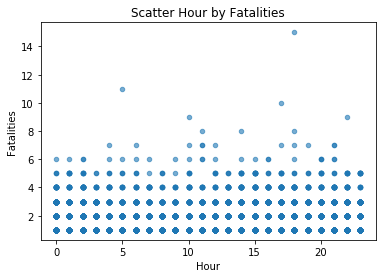

In [11]:
#Scatter plot hour against fatalities
accidents.plot(kind="scatter", x="HOUR", y="FATALS", title="Scatter Hour by Fatalities", alpha=.6)
plt.xlabel("Hour")
plt.ylabel("Fatalities")
plt.show()

As you can see, the horizontal bar chart is much more descriptive:

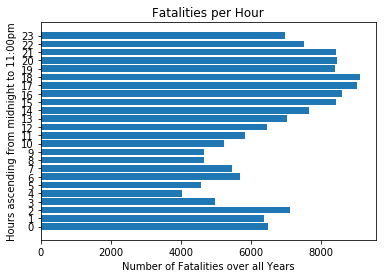

In [12]:
#Plot number of fatalities per hour
x = np.arange(24)
hours = accidents["HOUR"]
fatals = accidents["FATALS"]
y = []
for i in x:
    y.append(fatals[hours==i].sum())
labels = [str(i) for i in x]
positions = np.arange(len(labels))
fig = plt.figure()
plt.barh(positions,y, align="center")
plt.yticks(positions, labels)
plt.xlabel("Number of Fatalities over all Years")
plt.ylabel("Hours ascending from midnight to 11:00pm")
plt.title("Fatalities per Hour")
plt.show()
    
#accidents.plot(kind="barh", x = "HOUR", y="FATALS")
#plt.show()

## Problem 4

### 1. Does higher population density indicate higher fuel consumption?

In [13]:
road = data("road")

The outlier, Washington D.C. makes it appear that there is no correlation:

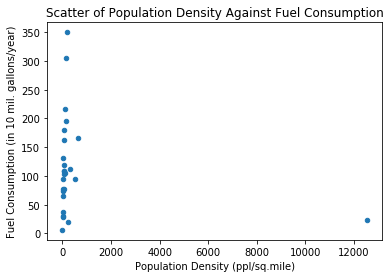

In [14]:
road.plot(kind="scatter", x="popden", y="fuel", 
          title="Scatter of Population Density Against Fuel Consumption")
plt.xlabel("Population Density (ppl/sq.mile)")
plt.ylabel("Fuel Consumption (in 10 mil. gallons/year)")
plt.show()

After removing Washington D.C., a correlation begins to emerge.

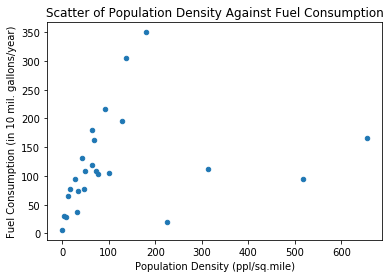

In [15]:
road[road["popden"]<4000].plot(kind="scatter", x="popden", y="fuel", 
                               title="Scatter of Population Density Against Fuel Consumption")
plt.xlabel("Population Density (ppl/sq.mile)")
plt.ylabel("Fuel Consumption (in 10 mil. gallons/year)")
plt.show()

After removing Connecticut, Delware, D.C., Maryland, and Massachussetts, the positive correlation between population density and fuel consumption is consistent.

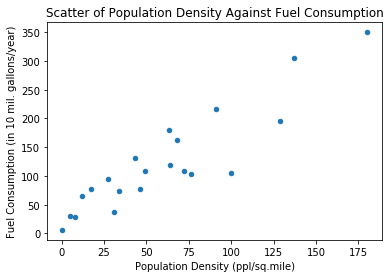

In [16]:
road[road["popden"]<210].plot(kind="scatter", x="popden", y="fuel", 
                              title="Scatter of Population Density Against Fuel Consumption")
plt.xlabel("Population Density (ppl/sq.mile)")
plt.ylabel("Fuel Consumption (in 10 mil. gallons/year)")
plt.show()

### 2. Does a correlation exist between number of drivers and number of deaths in a state?

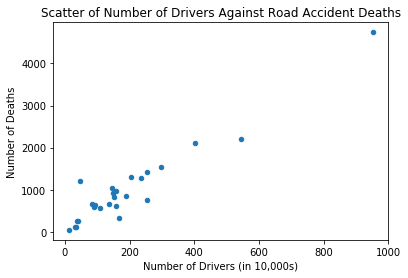

In [17]:
road.plot(kind="scatter", x="drivers", y="deaths",
          title="Scatter of Number of Drivers Against Road Accident Deaths")
plt.xlabel("Number of Drivers (in 10,000s)")
plt.ylabel("Number of Deaths")
plt.show()

The above correlation seems clear. There is a correlation between number of drivers and number of road accident deaths in a state. Removing the outlier California produces the following scatter plot:

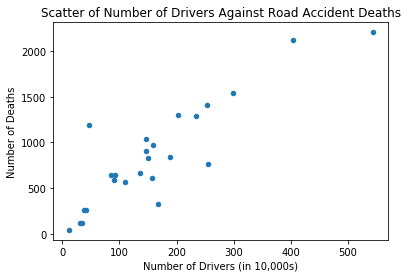

In [18]:
road[road["drivers"]<800].plot(kind="scatter", x="drivers", y="deaths",
                               title="Scatter of Number of Drivers Against Road Accident Deaths")
plt.xlabel("Number of Drivers (in 10,000s)")
plt.ylabel("Number of Deaths")
plt.show()

### 3. Does the temperature of a state in January affect its population density?

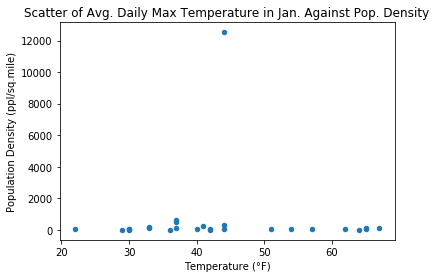

In [19]:
road.plot(kind="scatter", x="temp", y="popden",
          title="Scatter of Avg. Daily Max Temperature in Jan. Against Pop. Density")
plt.xlabel("Temperature (°F)")
plt.ylabel("Population Density (ppl/sq.mile)")
plt.show()

Again, Washington D.C. is the outlier in population density. The correlation is as follows after removing D.C.:

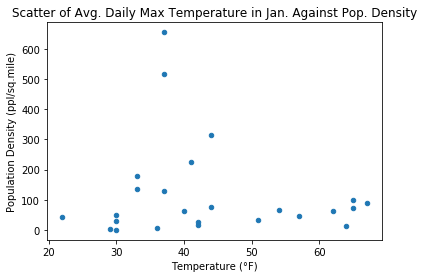

In [20]:
road[road["popden"]!=road["popden"].max()].plot(kind="scatter", x="temp", y="popden",
                                           title="Scatter of Avg. Daily Max Temperature in Jan. Against Pop. Density")
plt.xlabel("Temperature (°F)")
plt.ylabel("Population Density (ppl/sq.mile)")
plt.show()

There doses not seem to be a correlation between average daily max temperature in January on population density.

## Problem 5

### 1. What are the most common and least common crimes?

In [21]:
nyc_crimes = pd.read_csv("new_york_crime_clean.csv")
nyc_crimes.rename(columns={"OFFENSE":"YEAR"}, inplace=True)
print("Max:", nyc_crimes.sum().max())
print("Min:", nyc_crimes.sum().min())
nyc_crimes.iloc[:,1:].sum()

Max: 800356
Min: 8818


MURDER & NON-NEGL. MANSLAUGHTER                8818
RAPE                                          28699
ROBBERY                                      391028
FELONY ASSAULT                               350386
BURGLARY                                     398533
GRAND LARCENY                                800356
GRAND LARCENY OF MOTOR VEHICLE               268378
FELONY POSSESSION OF STOLEN PROPERTY          21393
FORGERY/THEFT_FRAUD/IDENTITY THEFT           178973
ARSON                                         28344
FELONY SEX CRIMES (3)                         22377
FELONY DANGEROUS DRUGS (1)                   435671
FELONY DANGEROUS WEAPONS (2)                  78917
FEL. CRIMINAL MISCHIEF & RELATED OFFENSES    158939
OTHER FELONIES (4)                           228647
dtype: int64

The most common crime is grand larceny, the least common crime is murder and non-negligent manslaughter.

### 2. Does a trend exist between robbery and drug felonies? If so, what is the trend?

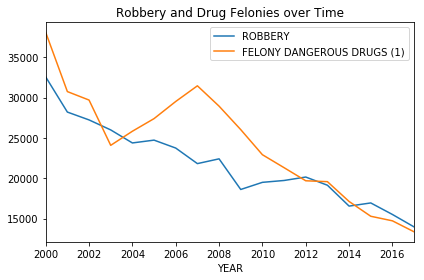

In [22]:
nyc_crimes.plot(x="YEAR", y=["ROBBERY", "FELONY DANGEROUS DRUGS (1)"],
                title="Robbery and Drug Felonies over Time")
plt.tight_layout()
plt.show()

Source: NYPD Historical New York City Crime Data. (web) https://www1.nyc.gov/site/nypd/stats/crime-statistics/historical.page Accessed Fall 2018. 

Yes a trend exists. They clearly have decreased simliarly over the last 18 years, with some discrepancy from 2005-2008.

### 3. Which crimes have had the largest distributions?

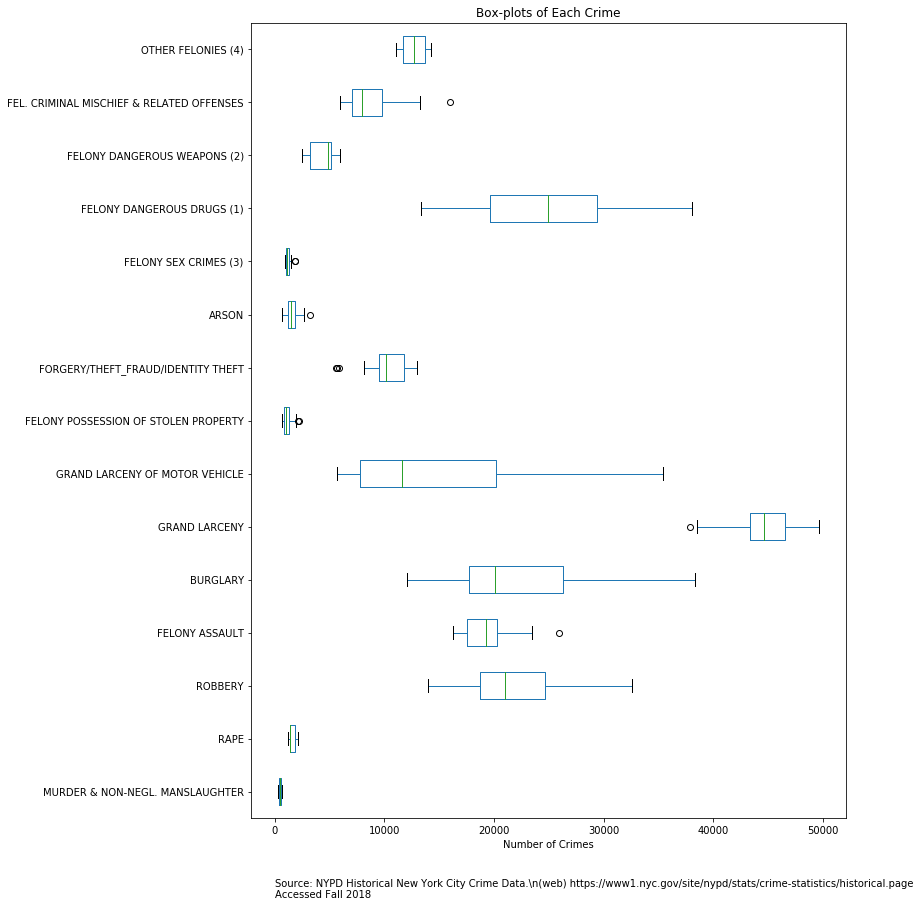

In [23]:
nyc_crimes.drop(["YEAR"], axis=1).plot(kind="box", vert=False, figsize=(12,12),
                                       title="Box-plots of Each Crime")
plt.xlabel("Number of Crimes")
plt.tight_layout()
plt.text(20, -1, r"Source: NYPD Historical New York City Crime Data.\n"
                  "(web) https://www1.nyc.gov/site/nypd/stats/crime-statistics/historical.page\n"
                   "Accessed Fall 2018")
plt.show()

Drug felonies, grand larceny of motor vehicle, burglary, and robbery have the largest distributions.